## Import Necessary Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# label encoding the data 
from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
  
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 
%matplotlib inline

## Loading the Data

In [18]:
df = pd.read_csv("Train.csv")
df.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [115]:
df.isna().sum()

X                            0
Y                            0
target_2015                  0
elevation                    0
precipitation_week1_2015     0
precipitation_week2_2015     0
precipitation_week3_2015     0
precipitation_week4_2015     0
precipitation_week5_2015     0
precipitation_week6_2015     0
precipitation_week7_2015     0
precipitation_week8_2015     0
precipitation_week9_2015     0
precipitation_week10_2015    0
precipitation_week11_2015    0
precipitation_week12_2015    0
precipitation_week13_2015    0
precipitation_week14_2015    0
precipitation_week15_2015    0
precipitation_week16_2015    0
precipitation_week17_2015    0
precipitation_week1_2019     0
precipitation_week2_2019     0
precipitation_week3_2019     0
precipitation_week4_2019     0
precipitation_week5_2019     0
precipitation_week6_2019     0
precipitation_week7_2019     0
precipitation_week8_2019     0
precipitation_week9_2019     0
precipitation_week10_2019    0
precipitation_week11_2019    0
precipit

In [ ]:
df.dtypes

In [ ]:
df.describe()

## Data Exploration

In [ ]:
df.isna().sum()

In [19]:
counter = 1
counter2 = 1
for col in df.columns:
    if 'precip 2014' in col:
        df.rename(columns = {col : f'precipitation_week{counter}_2015'}, inplace = True)
        counter = counter + 1
    elif 'precip 2015' in col:
        df.rename(columns = {col : f'precipitation_week{counter}_2015'}, inplace = True)
        counter = counter + 1
    elif 'precip 2019' in col:
        df.rename(columns = {col : f'precipitation_week{counter2}_2019'}, inplace = True)
        counter2 = counter2 + 1
df.rename(columns = {'LC_Type1_mode' : 'Land_type'}, inplace = True)

In [ ]:
df.columns

In [ ]:
df.Land_type.value_counts()

In [20]:
df.drop(['precipitation_week1_2015', 'precipitation_week2_2015', 'precipitation_week3_2015', 'precipitation_week4_2015','precipitation_week5_2015', 'precipitation_week6_2015', 'precipitation_week7_2015', 'precipitation_week8_2015', 'precipitation_week9_2015'], axis=1)

,X,Y,target_2015,elevation,precipitation_week10_2015,precipitation_week11_2015,precipitation_week12_2015,precipitation_week13_2015,precipitation_week14_2015,precipitation_week15_2015,...,precipitation_week10_2019,precipitation_week11_2019,precipitation_week12_2019,precipitation_week13_2019,precipitation_week14_2019,precipitation_week15_2019,precipitation_week16_2019,precipitation_week17_2019,Land_type,Square_ID
0,34.26,-15.91,0.0,887.764222,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389a-14ce-11ea-bce5-f49634744a41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,0.0,635.675022,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dfd-14ce-11ea-bce5-f49634744a41
16462,35.86,-15.43,0.0,632.598892,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dfe-14ce-11ea-bce5-f49634744a41
16463,35.86,-15.42,0.0,632.450136,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dff-14ce-11ea-bce5-f49634744a41
16464,35.86,-15.41,0.0,629.272733,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5e00-14ce-11ea-bce5-f49634744a41


In [21]:
df.drop(['precipitation_week9_2019', 'precipitation_week10_2019', 'precipitation_week11_2019', 'precipitation_week12_2019', 'precipitation_week13_2019', 'precipitation_week14_2019', 'precipitation_week15_2019', 'precipitation_week16_2019', 'precipitation_week17_2019'], axis = 1)

,X,Y,target_2015,elevation,precipitation_week1_2015,precipitation_week2_2015,precipitation_week3_2015,precipitation_week4_2015,precipitation_week5_2015,precipitation_week6_2015,...,precipitation_week1_2019,precipitation_week2_2019,precipitation_week3_2019,precipitation_week4_2019,precipitation_week5_2019,precipitation_week6_2019,precipitation_week7_2019,precipitation_week8_2019,Land_type,Square_ID
0,34.26,-15.91,0.0,887.764222,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,10,4e3c389a-14ce-11ea-bce5-f49634744a41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,0.0,635.675022,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,10,4e6f5dfd-14ce-11ea-bce5-f49634744a41
16462,35.86,-15.43,0.0,632.598892,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,10,4e6f5dfe-14ce-11ea-bce5-f49634744a41
16463,35.86,-15.42,0.0,632.450136,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,10,4e6f5dff-14ce-11ea-bce5-f49634744a41
16464,35.86,-15.41,0.0,629.272733,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,10,4e6f5e00-14ce-11ea-bce5-f49634744a41


In [22]:
df_2015 = df[['X','Y','target_2015','elevation','Land_type']]
df_2019 = df[['X', 'Y', 'elevation', 'Land_type']]

## Mean of 3 consecutive weeks - 2015

In [23]:
counter1 = 1
counter2 = 1
for col in df.columns:
    if '2015' in col and counter1 <= 7:
        df_2015[f'mean_{counter2}'] = (df[f'precipitation_week{counter1}_2015'] + df[f'precipitation_week{counter1+1}_2015'])/2
        counter1 += 2
        counter2 += 1

<ipython-input-23-9f99d9cdae3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015[f'mean_{counter2}'] = (df[f'precipitation_week{counter1}_2015'] + df[f'precipitation_week{counter1+1}_2015'])/2


In [ ]:
df_2015.head()

<AxesSubplot:xlabel='X', ylabel='Y'>

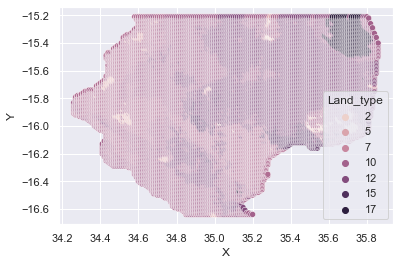

In [24]:
sns.scatterplot(x='X', y='Y', data=df, hue='Land_type')

In [ ]:
sns.scatterplot(x='X', y='Y', data=df, hue='elevation')

## Maximum within 3 consecutive weeks - 2015

In [25]:
maximum = 0
counter1 = 1
for col in df.columns:
    if ('2015' in col) and (counter1 <= 6):
        value = df[f'precipitation_week{counter1}_2015'] + df[f'precipitation_week{counter1+1}_2015'] + df[f'precipitation_week{counter1+2}_2015']
        maximum = np.maximum(maximum, value)
        counter1 += 1

In [26]:
df_2015['maximum_2015'] = maximum

<ipython-input-26-9ec0e9c01f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['maximum_2015'] = maximum


In [27]:
df_2015.head()

,X,Y,target_2015,elevation,Land_type,mean_1,mean_2,mean_3,mean_4,maximum_2015
0,34.26,-15.91,0.0,887.764222,9,0.0,7.422013,13.395295,43.789204,99.816174
1,34.26,-15.90,0.0,743.403912,9,0.0,7.422013,13.395295,43.789204,99.816174
2,34.26,-15.89,0.0,565.728343,9,0.0,7.422013,13.395295,43.789204,99.816174
3,34.26,-15.88,0.0,443.392774,10,0.0,7.422013,13.395295,43.789204,99.816174
4,34.26,-15.87,0.0,437.443428,10,0.0,7.422013,13.395295,43.789204,99.816174


## Mean of 3 consecutive weeks - 2019

In [28]:
counter1 = 1
counter2 = 1
for col in df.columns:
    if '2019' in col and counter1 <= 7:
        df_2019[f'mean_{counter2}'] = (df[f'precipitation_week{counter1}_2019'] + df[f'precipitation_week{counter1+1}_2019'])/2
        counter1 += 2
        counter2 += 1

<ipython-input-28-ef8c65411a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019[f'mean_{counter2}'] = (df[f'precipitation_week{counter1}_2019'] + df[f'precipitation_week{counter1+1}_2019'])/2


In [ ]:
df_2019.head()

## Maximum within 3 consecutive weeks - 2019

In [29]:
maximum = 0
counter1 = 1
for col in df.columns:
    if ('2019' in col) and (counter1 <= 6):
        value = df[f'precipitation_week{counter1}_2019'] + df[f'precipitation_week{counter1+1}_2019'] + df[f'precipitation_week{counter1+2}_2019']
        maximum = np.maximum(maximum, value)
        counter1 += 1

In [30]:
df_2019['maximum_2019'] = maximum

<ipython-input-30-835739c6d0b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['maximum_2019'] = maximum


In [31]:
df_2019.head()

,X,Y,elevation,Land_type,mean_1,mean_2,mean_3,mean_4,maximum_2019
0,34.26,-15.91,887.764222,9,8.787738,19.916772,14.041657,38.313574,86.44577
1,34.26,-15.90,743.403912,9,8.787738,19.916772,14.041657,38.313574,86.44577
2,34.26,-15.89,565.728343,9,8.787738,19.916772,14.041657,38.313574,86.44577
3,34.26,-15.88,443.392774,10,8.787738,19.916772,14.041657,38.313574,86.44577
4,34.26,-15.87,437.443428,10,8.787738,19.916772,14.041657,38.313574,86.44577


<AxesSubplot:xlabel='X', ylabel='Y'>

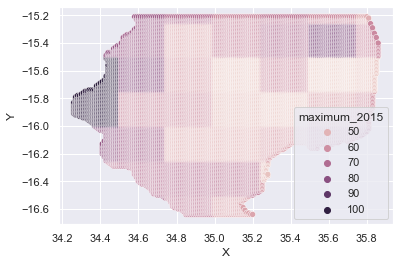

In [109]:
sns.scatterplot(x='X', y='Y', data=df_2015, hue='maximum_2015')

<AxesSubplot:xlabel='X', ylabel='Y'>

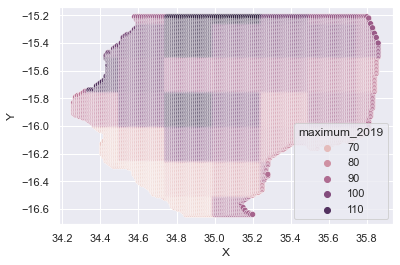

In [110]:
sns.scatterplot(x='X', y='Y', data=df_2019, hue='maximum_2019')

In [39]:
df_2015.dtypes

X               float64
Y               float64
target_2015     float64
elevation       float64
Land_type         int64
mean_1          float64
mean_2          float64
mean_3          float64
mean_4          float64
maximum_2015    float64
dtype: object

In [51]:
new_2015 = df_2015.astype({'Land_type': 'category'})

In [52]:
new_2019 = df_2019.astype({'Land_type': 'category'})

<AxesSubplot:xlabel='X', ylabel='Y'>

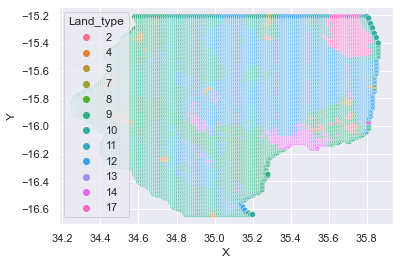

In [111]:
sns.scatterplot(x="X",y="Y", data=new_2015, hue="Land_type")

<AxesSubplot:xlabel='X', ylabel='Y'>

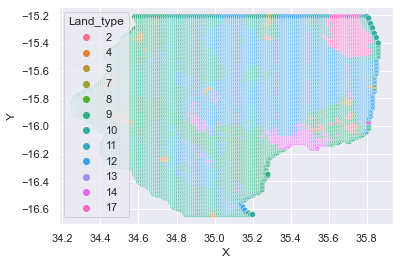

In [112]:
sns.scatterplot(x="X",y="Y", data=new_2019, hue="Land_type")

In [92]:
X = new_2015.drop(columns=['target_2015'], axis=1)
y = new_2015["target_2015"]

In [93]:
#X_train = pd.get_dummies(data=X)
#y_train = new_2015['target_2015']

#X_test = pd.get_dummies(data=X)
#y_test = new_2019
X_train, X_test, y_train, y_test = train_test_split(X,y) # ensure reproductibility

In [94]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test',  X_test.shape)
print('y_test',  y_test.shape)

X_train (12349, 9)
y_train (12349,)
X_test (4117, 9)
y_test (4117,)


In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [96]:
print(model.intercept_)

-4.4509948772680055


In [97]:
model.coef_

array([ 0.10444562, -0.06776181, -0.00016415, -0.00965223,  0.00602493,
       -0.01026037, -0.00354058, -0.01332353,  0.00652086])

In [99]:
predictions = model.predict(X_test)
X = X_test.reset_index().copy()
X["target_2015"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,X,Y,elevation,Land_type,mean_1,mean_2,mean_3,mean_4,maximum_2015,target_2015,prediction
0,10752,35.24,-16.46,126.070737,9,0.000000,3.970911,12.851411,23.781778,65.800737,0.000000,0.263439
1,7953,35.03,-15.44,515.258137,12,0.000000,1.208945,12.848727,24.423009,61.370393,0.000000,0.070461
2,8831,35.09,-15.30,472.152724,12,0.000000,1.208945,12.848727,24.423009,61.370393,0.603196,0.074317
3,6699,34.95,-16.46,72.094919,10,0.000000,8.541899,9.832816,26.413900,66.587993,0.000000,0.166210
4,4520,34.79,-15.39,401.200310,10,0.615581,4.809031,13.024004,19.582203,51.908518,0.000000,0.048981


MSE of the simple model is 0.05


In [105]:
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 0.000 Estimated value: 0.26344
Real value: 0.000 Estimated value: 0.07046
Real value: 0.603 Estimated value: 0.07432
Real value: 0.000 Estimated value: 0.16621
Real value: 0.000 Estimated value: 0.04898


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
simple_pe = mean_squared_error(predictions, y_test)
print(f'MSE of the simple model is {np.round(simple_pe,2)}')

MSE of the simple model is 0.05


Slope: 0.9776133798105532
Intercept: 0.0036594389721333054
R-value: 1.0
P-value: 0.0
Std-error: 0.0


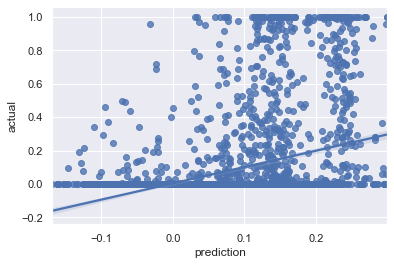

In [116]:
import scipy
results = pd.DataFrame({"prediction": predictions,
                                   "actual": y_test })
p = sns.regplot(x="prediction", y="actual",
                data=results)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
print("Slope: " + str(slope))
print("Intercept: " + str(intercept))
print("R-value: " + str(r_value))
print("P-value: " + str(p_value))
print("Std-error: " + str(std_err))